# Soru 1:
Plot a line plot with seaborn for total deaths four the four countries (Spain, France, Germany, Italy) after April 1, 2020.

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings

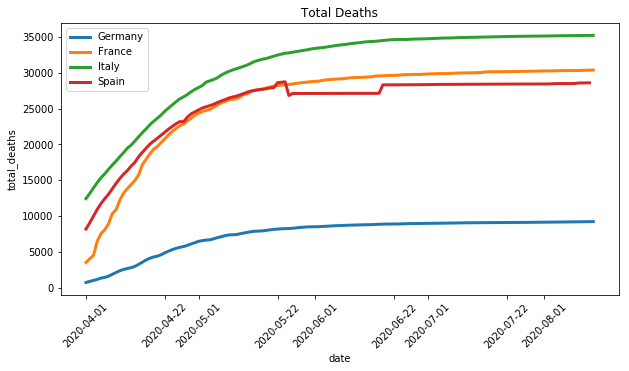

In [20]:
data=pd.read_csv("owid-covid-data.csv", parse_dates=["date"])

country=pd.DataFrame(data[data["location"].isin(["Germany","France",
                                                 "Italy","Spain"]) & 
                          (data["date"]>=pd.to_datetime("2020-04-01"))])


germany=pd.DataFrame(country[country["location"]=="Germany"])
france=pd.DataFrame(country[country["location"]=="France"])
italy=pd.DataFrame(country[country["location"]=="Italy"])
spain=pd.DataFrame(country[country["location"]=="Spain"])

plt.figure(figsize=(10,5))
plt.title("Total Deaths")
plt.xlabel("Dates")
plt.ylabel("Total Deaths")

sns.lineplot(x=germany["date"],y=germany["total_deaths"],linewidth=3)
sns.lineplot(france["date"],france["total_deaths"],linewidth=3)
sns.lineplot(italy["date"],italy["total_deaths"],linewidth=3)
sns.lineplot(spain["date"],spain["total_deaths"],linewidth=3)
plt.legend(["Germany","France","Italy","Spain"])

#ticks; eksende düzenleme yapmak için kullanılır.x eksenindeki değerleri
# 45 dereceyle yatık göstermek için xticks(rotation=45) yazılır.
plt.xticks(rotation=45)
plt.show()

# Soru 2:
Plot a bar plot with seaborn for average death number that compares continents.

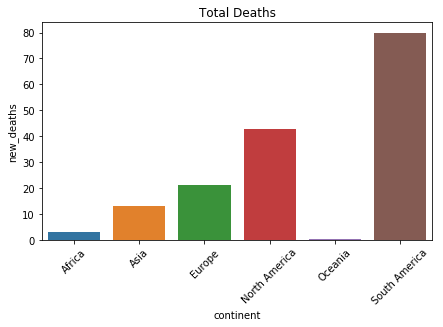

In [145]:
data=pd.read_csv("owid-covid-data.csv", parse_dates=["date"])

avg_death=data.groupby(by="continent")["new_deaths"].mean()
df=pd.DataFrame(avg_death).reset_index()

plt.figure(figsize=(7,4))
plt.title("Total Deaths")
plt.xlabel("Continents")
plt.ylabel("Average Death")

sns.barplot(df['continent'],df['new_deaths'])
plt.xticks(rotation=45)

plt.show()

# Soru 3:
Plot a histogram for daily deaths for any country you choose. Make four subplots for different bin counts and kde arguments.

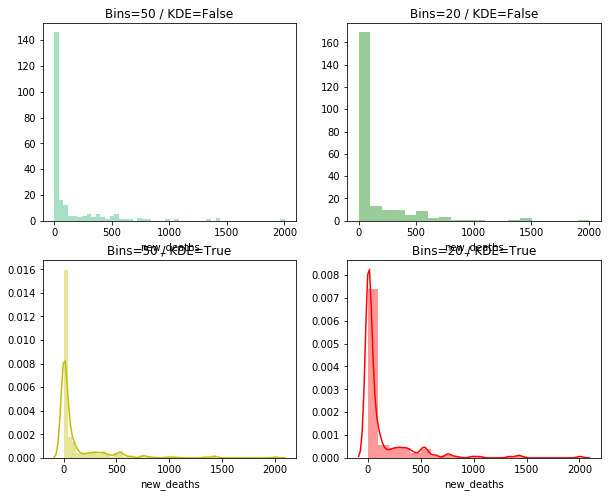

In [143]:
# Seaborn da histogram çizdirme; distborn() fonksiyonu ile olmaktadır.

data=pd.read_csv("owid-covid-data.csv", parse_dates=["date"])

df=pd.DataFrame(data[data['location']=="France"])

plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
plt.title("Bins=50 / KDE=False")
sns.distplot(df["new_deaths"].dropna(), bins=50, kde=False,color = '#22B573')


plt.subplot(2,2,2)
plt.title("Bins=20 / KDE=False")
sns.distplot(df["new_deaths"].dropna(), bins=20, kde=False, color = "g")


plt.subplot(2,2,3)
plt.title("Bins=50 / KDE=True")
sns.distplot(df["new_deaths"].dropna(), bins=50, kde=True, color = "y")



plt.subplot(2,2,4)
plt.title("Bins=20 / KDE=True")
sns.distplot(df["new_deaths"].dropna(), bins=20, kde=True, color = "r")



plt.show()


# Soru 4:
Create a figure and three subplots containing boxplot, violin plot and swarm plot for daily deaths of two countries you choose.

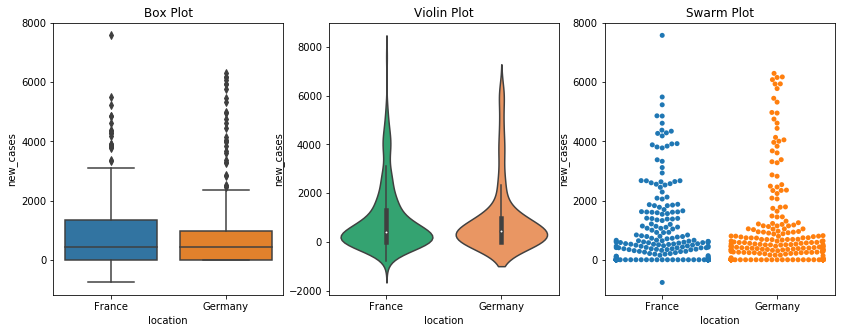

In [126]:
data=pd.read_csv("owid-covid-data.csv", parse_dates=["date"])

df=pd.DataFrame(data[data['location'].isin(["Germany","France"])])

plt.figure(figsize=(14,5))

plt.subplot(1,3,1)
plt.title("Box Plot")
plt.xlabel("Country")
plt.ylabel("Daily Deaths")
sns.boxplot(df["location"],df["new_cases"])

plt.subplot(1,3,2)
plt.title("Violin Plot")
sns.violinplot(df["location"],df["new_cases"],palette = ['#22B573', '#FF914D'])

plt.subplot(1,3,3)
plt.title("Swarm Plot")
sns.swarmplot(df["location"],df["new_cases"])

plt.show()
